### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
# bootstrap sample, ie resamble n times, and put selected value back in 'hat'
bootsample = sample_data.sample(200, replace=True)
# get mean height of coffee and drinkers and abstainers
mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
# calculate difference in mean height
mean_coff - mean_nocoff

1.9732964788157545

In [4]:
# run above process 10,000 times
# set up empty array
diff = []
for _ in range(int(1e4)):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)

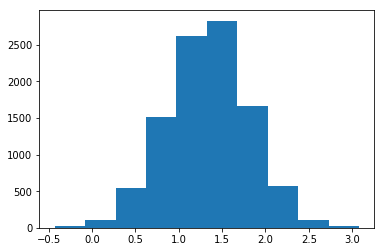

In [5]:
plt.hist(diff);

In [6]:
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(0.39656867909093169, 2.2432588681124641)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [7]:
sample_data.head(2)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636


In [8]:
# bootstrap sample, ie resamble n times, and put selected value back in 'hat'
bootsample_age = sample_data.sample(200, replace=True)
# get mean height of coffee and drinkers and abstainers
mean_coff_age = bootsample_age[bootsample_age['age'] == '<21']['height'].mean()
mean_nocoff_age = bootsample_age[bootsample_age['age'] == '>=21']['height'].mean()
# calculate difference in mean height
mean_coff_age - mean_nocoff_age

-3.728992436117508

In [21]:
# run above process 10,000 times
# set up empty array
diff_by_age = []
for _ in range(int(1e4)):
    bootsample_age = sample_data.sample(200, replace=True)
    mean_young_height = bootsample_age[bootsample_age['age'] == '<21']['height'].mean()
    mean_old_height = bootsample_age[bootsample_age['age'] == '>=21']['height'].mean()
    diff_by_age.append(mean_young_height - mean_old_height)

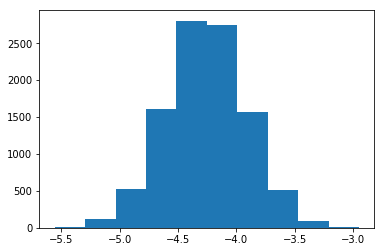

In [22]:
plt.hist(diff_by_age);

In [23]:
np.percentile(diff_by_age, 2.5), np.percentile(diff_by_age, 97.5)

(-4.9210664327332525, -3.5880436955292634)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [14]:
# run process 10,000 times
# set up empty array
diff_young_coffee = []
for _ in range(int(1e4)):
    boot = sample_data.sample(200, replace=True)
    mean_coff_young = boot[(boot['age'] == '<21') & (boot['drinks_coffee'] == True)]['height'].mean()
    mean_nocoff_young = boot[(boot['age'] == '<21') & (boot['drinks_coffee'] == False)]['height'].mean()
    diff_young_coffee.append(mean_coff_young - mean_nocoff_young)

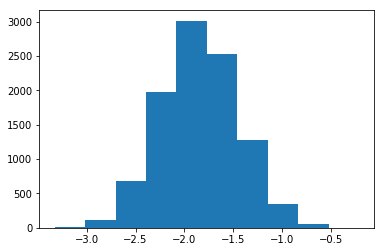

In [15]:
plt.hist(diff_young_coffee);

In [16]:
np.percentile(diff_young_coffee, 2.5), np.percentile(diff_young_coffee, 97.5)

(-2.5932349683121472, -1.0576905013896116)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [17]:
# run process 10,000 times
# set up empty array
diff_old_coffee = []
for _ in range(int(1e4)):
    boot = sample_data.sample(200, replace=True)
    mean_coff_old = boot[(boot['age'] == '>=21') & (boot['drinks_coffee'] == True)]['height'].mean()
    mean_nocoff_old = boot[(boot['age'] == '>=21') & (boot['drinks_coffee'] == False)]['height'].mean()
    diff_old_coffee.append(mean_coff_old - mean_nocoff_old)

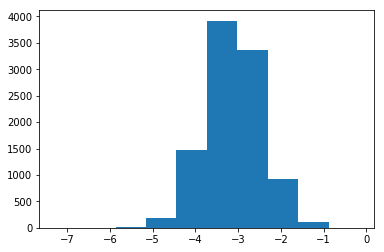

In [18]:
plt.hist(diff_old_coffee);

In [19]:
np.percentile(diff_old_coffee, 2.5), np.percentile(diff_old_coffee, 97.5)

(-4.4022899680488763, -1.8264772065700463)